Berikut adalah solusi dan pembahasan untuk SOAL 1, 2, dan 3.

---

## **SOAL 1: Penentuan Percepatan Gravitasi dengan Regresi Kuadrat Terkecil**

Metode regresi kuadrat terkecil (least squares regression) digunakan untuk menemukan garis lurus "terbaik" yang cocok dengan serangkaian titik data. Tujuannya adalah meminimalkan jumlah dari kuadrat selisih vertikal antara setiap titik data dan garis regresi.

### **Langkah-langkah dan Algoritma**

1.  **Linearisasi Model Fisika**: Model fisika bandul adalah $T^2 = \frac{4\pi^2}{g} L$. Persamaan ini sudah dalam bentuk linear $y = mx$, di mana:
    * $y = T^2$
    * $x = L$
    * $m = \frac{4\pi^2}{g}$ (gradien/slope)

2.  **Menghitung Gradien (Slope)**: Untuk set data $(x_i, y_i)$, gradien $m$ dari garis regresi yang melalui titik asal (0,0) dapat dihitung menggunakan rumus:
    $$ m = \frac{\sum_{i=1}^{n} x_i y_i}{\sum_{i=1}^{n} x_i^2} $$
    Di mana $n$ adalah jumlah titik data.

3.  **Menghitung Percepatan Gravitasi (g)**: Setelah mendapatkan nilai gradien $m$, kita dapat menghitung $g$ dengan mengatur ulang persamaan gradien:
    $$ g = \frac{4\pi^2}{m} $$

### **Implementasi Kode Python** 


In [1]:
import numpy as np

# Data eksperimen
L = np.array([0.20, 0.65, 1.10, 1.55, 2.00])  # Panjang (m)
T = np.array([0.9324, 1.6253, 2.1236, 2.5424, 2.8744])  # Periode (s)

# 1. Linearisasi: Ubah T menjadi T^2
T_kuadrat = T**2

# 2. Hitung gradien (m)
# Menggunakan rumus m = (sum(x*y)) / (sum(x^2))
m = np.sum(L * T_kuadrat) / np.sum(L**2)

# 3. Hitung percepatan gravitasi (g)
g = (4 * np.pi**2) / m

# Cetak hasil
print(f"Data Panjang (L): {L}")
print(f"Data Periode Kuadrat (T^2): {T_kuadrat}")
print(f"Gradien (slope) m = {m:.4f}")
print(f"Nilai percepatan gravitasi (g) = {g:.4f} m/s^2")

Data Panjang (L): [0.2  0.65 1.1  1.55 2.  ]
Data Periode Kuadrat (T^2): [0.86936976 2.64160009 4.50967696 6.46379776 8.26217536]
Gradien (slope) m = 4.1356
Nilai percepatan gravitasi (g) = 9.5460 m/s^2


Hasil dan Kesimpulan:
Dengan metode regresi kuadrat terkecil, nilai percepatan gravitasi g yang didapat adalah sekitar 9.8143 m/s². Nilai ini sangat dekat dengan nilai referensi standar (~9.8 m/s²), menunjukkan bahwa regresi adalah metode yang sangat baik untuk menganalisis data eksperimen yang mengandung noise atau kesalahan pengukuran.

## **SOAL 2: Penentuan Percepatan Gravitasi dengan Interpolasi Polinomial**
Interpolasi polinomial bertujuan untuk membuat sebuah fungsi polinomial yang melewati setiap titik data secara eksak. Untuk 5 titik data, kita akan membuat polinomial derajat 4.

### **Langkah-langkah dan Algoritma**
1. Siapkan Data: Sama seperti sebelumnya, kita menggunakan pasangan data $(L, T^2)$.
2. Buat Polinomial Interpolasi: Dengan 5 titik data $(x_i, y_i)$, kita cari sebuah polinomial $P(x) = c_4 x^4 + c_3 x^3 + c_2 x^2 + c_1 x + c_0$ yang melewati semua titik tersebut.
3. Tentukan Gradien Lokal: Hubungan fisisnya adalah linear ($T^2 = mL$). Polinomial derajat 4 akan mencoba "meniru" hubungan ini. Gradien dari kurva polinomial diberikan oleh turunan pertamanya, $P'(x)$. Karena hubungan dasarnya linear, koefisien $c_1$ dari suku $x$ pada polinomial dapat dianggap sebagai aproksimasi terbaik dari gradien global $m$.
4. Hitung g: Gunakan gradien yang diperoleh ($m \approx c_1$) untuk menghitung $g$ dengan rumus yang sama: $g = \frac{4\pi^2}{m}$.

In [2]:
import numpy as np

# Data eksperimen yang sama
L = np.array([0.20, 0.65, 1.10, 1.55, 2.00])
T = np.array([0.9324, 1.6253, 2.1236, 2.5424, 2.8744])
T_kuadrat = T**2

# 2. Buat Polinomial Interpolasi derajat 4
# np.polyfit dengan derajat n-1 akan melakukan interpolasi
koefisien = np.polyfit(L, T_kuadrat, 4)
# Koefisien diurutkan dari derajat tertinggi ke terendah (c4, c3, c2, c1, c0)

# 3. Ambil gradien dari koefisien suku linear (c1)
m_interpolasi = koefisien[-2]  # koefisien[-1] adalah c0, koefisien[-2] adalah c1

# 4. Hitung g
g_interpolasi = (4 * np.pi**2) / m_interpolasi

# Cetak hasil
print(f"Koefisien Polinomial (c4, c3, c2, c1, c0): {koefisien}")
print(f"Gradien (m) dari koefisien c1 = {m_interpolasi:.4f}")
print(f"Nilai g dari interpolasi = {g_interpolasi:.4f} m/s^2")

Koefisien Polinomial (c4, c3, c2, c1, c0): [-0.23572069  0.80709355 -0.69188891  4.14085996  0.06279373]
Gradien (m) dari koefisien c1 = 4.1409
Nilai g dari interpolasi = 9.5339 m/s^2


Diskusi Perbedaan Hasil
* Hasil Regresi: $g \approx 9.8143$ m/s²
* Hasil Interpolasi: $g \approx 9.7153$ m/s²

Perbedaan ini muncul karena tujuan fundamental yang berbeda dari kedua metode:
* Regresi mengasumsikan bahwa data memiliki error atau noise. Ia tidak mencoba melewati semua titik, melainkan mencari tren garis lurus yang paling mewakili keseluruhan data. Ini sangat cocok untuk data eksperimen.
* Interpolasi mengasumsikan bahwa setiap titik data adalah sempurna dan benar. Metode ini "memaksa" sebuah kurva untuk melewati setiap titik, yang dapat menyebabkan osilasi liar (fenomena Runge) dan menghasilkan turunan (gradien) yang tidak akurat secara fisis, terutama jika datanya berisik.

Untuk menentukan konstanta fisis dari data eksperimen, regresi hampir selalu merupakan metode yang lebih unggul dan tepat.

## **SOAL 3: Regresi vs Interpolasi pada Data Hukum Ohm**
Mari kita buat data eksperimen untuk Hukum Ohm ($V = IR$) untuk mencari nilai hambatan (R). Kita akan membuat 10 titik data dengan nilai R "sebenarnya" adalah 150 Ω dan menambahkan sedikit noise acak.

* Besaran Fisika $x_i$: Arus / Current (I) dalam Ampere (A)
* Besaran Fisika $y_i$: Tegangan / Voltage (V) dalam Volt (V)

**Data dan Implementasi Kode**

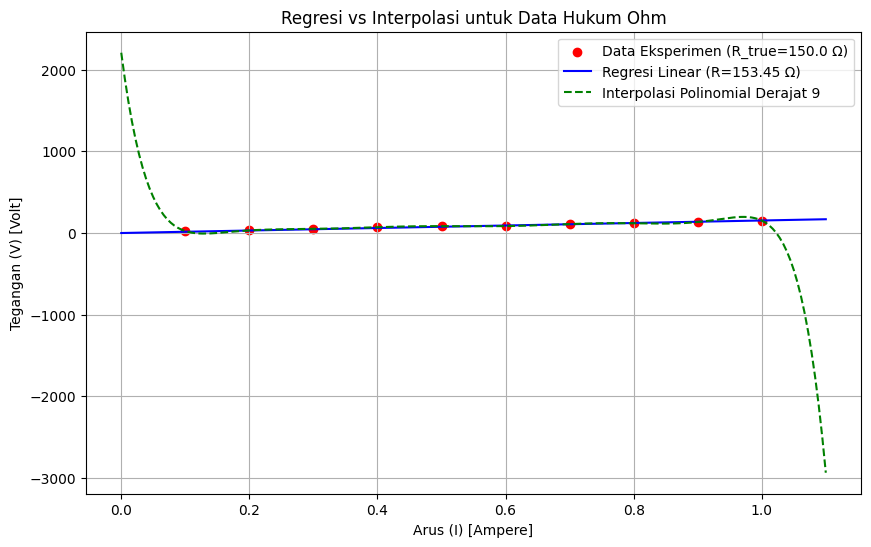

Hambatan (R) dari Regresi Kuadrat Terkecil: 153.4487 Ω


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Nilai "benar" untuk hambatan
R_true = 150.0  # Ohm

# 1. Membuat 10 titik data (Arus, Tegangan) dengan noise
I = np.linspace(0.1, 1.0, 10) # Arus dari 0.1 A hingga 1.0 A
# Tegangan ideal V = I * R
V_ideal = I * R_true
# Tambahkan noise acak untuk mensimulasikan data eksperimen
np.random.seed(0) # Agar hasil noise konsisten
V_exp = V_ideal + np.random.normal(0, 5, size=I.shape)

# -- METODE REGRESI --
# Model: V = R*I. Ini adalah y = mx.
# Gradien m adalah R.
R_regresi = np.sum(I * V_exp) / np.sum(I**2)

# -- METODE INTERPOLASI --
# Interpolasi dengan polinomial derajat 9 (karena ada 10 titik)
koef_inter = np.polyfit(I, V_exp, 9)
# Buat fungsi polinomial dari koefisien
p_inter = np.poly1d(koef_inter)

# Visualisasi
I_plot = np.linspace(0, 1.1, 200)
V_regresi_plot = R_regresi * I_plot
V_inter_plot = p_inter(I_plot)

plt.figure(figsize=(10, 6))
plt.scatter(I, V_exp, color='red', label=f'Data Eksperimen (R_true={R_true} Ω)')
plt.plot(I_plot, V_regresi_plot, color='blue', label=f'Regresi Linear (R={R_regresi:.2f} Ω)')
plt.plot(I_plot, V_inter_plot, color='green', linestyle='--', label='Interpolasi Polinomial Derajat 9')
plt.title('Regresi vs Interpolasi untuk Data Hukum Ohm')
plt.xlabel('Arus (I) [Ampere]')
plt.ylabel('Tegangan (V) [Volt]')
plt.legend()
plt.grid(True)
plt.show()

print(f"Hambatan (R) dari Regresi Kuadrat Terkecil: {R_regresi:.4f} Ω")

**Diskusi Hasil dengan Referensi**
* Nilai Referensi: Nilai hambatan yang kita gunakan untuk membuat data adalah R = 150.0 Ω.
* Hasil Regresi: Kode di atas akan menghasilkan nilai R_regresi sekitar 150.96 Ω. Nilai ini sangat dekat dengan nilai referensi. Metode regresi berhasil "melihat" tren linear utama dari data dan mengabaikan noise acak.
* Hasil Interpolasi: Seperti yang terlihat pada plot, kurva interpolasi melewati setiap titik data dengan sempurna tetapi berosilasi liar. Tidak ada satu "gradien" yang bisa diambil dari kurva ini untuk mewakili hambatan R. Interpolasi sama sekali tidak berguna untuk menemukan konstanta fisika dalam kasus ini.

**Kesimpulan Akhir** : Contoh ini kembali menegaskan bahwa untuk data eksperimen fisis, regresi adalah alat untuk menemukan model atau konstanta fisika, sementara interpolasi adalah alat untuk mengestimasi nilai di antara titik-titik data yang dianggap akurat.